In [164]:
import glob, os, json

import pandas as pd
import numpy as np

import plotly.express as px

pd.set_option('display.max_columns', 35)
pd.set_option('display.max_colwidth', None)


import warnings
warnings.filterwarnings("ignore")

In [165]:
# https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8

json_dir = os.getcwd() +'/data/'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []

for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)

df = pd.concat(dfs)

In [166]:
# convert to fees to Algo, tx amount to more widely known USDC format 
df.fee = df.fee / 1000000
df['asset-transfer-transaction.amount'] = df['asset-transfer-transaction.amount'] / 1000000

## EDA

In [167]:
df.shape

(66855, 32)

In [168]:
# Number of Unique Rounds in the data
df['confirmed-round'].nunique()

62247

In [169]:
df.head(5)

,close-rewards,closing-amount,confirmed-round,fee,first-valid,genesis-hash,id,intra-round-offset,last-valid,lease,receiver-rewards,round-time,sender,sender-rewards,tx-type,asset-transfer-transaction.amount,asset-transfer-transaction.asset-id,asset-transfer-transaction.close-amount,asset-transfer-transaction.receiver,signature.sig,signature.logicsig.args,signature.logicsig.logic,signature.logicsig.multisig-signature.subsignature,signature.logicsig.multisig-signature.threshold,signature.logicsig.multisig-signature.version,genesis-id,group,note,signature.multisig.subsignature,signature.multisig.threshold,signature.multisig.version,asset-transfer-transaction.close-to
0,0,0,14651056,0.001,14651052,wGHE2Pwdvd7S12BL5FaOP20EGYesN73ktiC1qzkkit8=,77V5EVCRQ4AYXZTB6EXNVHYCY3F7ZD5MZ4AV6S3MCD5E5F3ICMPQ,27,14652052,6D8z9AsoLigs2gwedoUijR3ftp5J7TS3/K9Oh69K3Ds=,0,1624721750,ZG54ZBZ5LVWV3MTGOPDSKCBL5LEQTAPUTN5OQQZUMTAYV3JIICA7G3RJZE,997,axfer,9208.99,31566704,0,2UEQTE5QDNXPI7M3TU44G6SYKLFWLPQO7EBZM7K7MHMQQMFI4QJPLHQFHM,XC79J+JKOQkCKnOPOHG0eYGUbOMNvVkMy2j7pceiklI5fVMY1W/jWLBFIsFicY/wc2BsCdEJE4ZAej2QkewdBA==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,14651197,0.001,14651194,wGHE2Pwdvd7S12BL5FaOP20EGYesN73ktiC1qzkkit8=,IRBAPPLBLYPFFMJXLJ7Y4LTUNKZUBROKQYTPSVEFDHDMT6ZA4DTQ,47,14652194,ObB+0T90MuHTDASCHI2R7Y3iaGLIxYhvl/yJWIkBuDQ=,0,1624722362,ZG54ZBZ5LVWV3MTGOPDSKCBL5LEQTAPUTN5OQQZUMTAYV3JIICA7G3RJZE,997,axfer,585.49,31566704,0,2UEQTE5QDNXPI7M3TU44G6SYKLFWLPQO7EBZM7K7MHMQQMFI4QJPLHQFHM,7ImQqgdtMyllqdCh2kchf23dZ4Up+7Tvu6ZlWM0cODBv2Zfaifro54oHbLh0GSjrlPv7Be8DldE8h4eF7WCBBw==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,14651403,0.001,14651399,wGHE2Pwdvd7S12BL5FaOP20EGYesN73ktiC1qzkkit8=,7NNQN77V2NHXOWBDG573BU23JKBUNCXKC7J5O5EUHHUTIKNVIGCQ,0,14652399,9oWmeC4/Owoi7Xmu90+0cM616h2OIOT38O6hcgAE7vE=,0,1624723258,ZG54ZBZ5LVWV3MTGOPDSKCBL5LEQTAPUTN5OQQZUMTAYV3JIICA7G3RJZE,1994,axfer,112.00,31566704,0,2UEQTE5QDNXPI7M3TU44G6SYKLFWLPQO7EBZM7K7MHMQQMFI4QJPLHQFHM,Pia6tL6RxAmFDAQ0msfmgtFAwrkoDKqi/ImRO9vb0sXXGvKeNco1ieBWbEx451oT56rpXBnwBNePqm8+kKYnCw==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,14651681,0.001,14651678,wGHE2Pwdvd7S12BL5FaOP20EGYesN73ktiC1qzkkit8=,47C3O7ADWDJAMRUARMOG5UNXP2IWDCZFUSMG2H6RKRGJR5Z7TGCA,83,14652678,3cuzbppzzBsfo4RQzMKlCFbdyPWVq65XKkEG2q+lCUw=,0,1624724466,ZG54ZBZ5LVWV3MTGOPDSKCBL5LEQTAPUTN5OQQZUMTAYV3JIICA7G3RJZE,1994,axfer,280500.41,31566704,0,2UEQTE5QDNXPI7M3TU44G6SYKLFWLPQO7EBZM7K7MHMQQMFI4QJPLHQFHM,5FbxOp9jMKgXO3617f1oEr9D0GrFSNAwYVbNaS9pqgXuD1Vwza767n0Ki3cdozR4+T4yi2XtabCrzy/AG4toCw==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,14651820,0.001,14651816,wGHE2Pwdvd7S12BL5FaOP20EGYesN73ktiC1qzkkit8=,N2KVFOAA5ZSXPJN3M2ZYT5TNIUERNYLQMQH6XRYBAEPKOWYFZK7Q,1,14652816,Xug5KWS+7kxlpEmOOsPvEiYybj5rq6OPcoDdTuPKuM4=,0,1624725074,2UEQTE5QDNXPI7M3TU44G6SYKLFWLPQO7EBZM7K7MHMQQMFI4QJPLHQFHM,56870,axfer,103121.65,31566704,0,ZG54ZBZ5LVWV3MTGOPDSKCBL5LEQTAPUTN5OQQZUMTAYV3JIICA7G3RJZE,NaN,[7i1nzZPvkk/3Tpoi9uuslxjUKg/dPpWLzFpwIwy0FL0vZBTINNJWACNaTFFgqx7xNgDwLAUDztDTMdGmD/CxCw==],ASADwMyNCATw1oYPJgIgybvMhz1dbV2yZnPHJQgr6skJgfSbeuhDNGTBiu0oQIEgdKWxEDtStQNW3B5ww6xpYlGP2UWAn3r9TsiMXxnoWAExBCIMMRAjEhAxESQSEDEUKBIQMRctKQQQ,"[{'public-key': 'v8w/YDBK3MmuXQg3njxy1K9cgEZIN2UQWDF3W5vp4MY=', 'signature': 'GE1mVtsR/zOuqo8eMRTcaGLTjFJvCIjcGF40IOxMeaB9+rWPWI+/zB3NNtpmDGkIcCk5IrV3/d7UV1WwJJWnCg=='}, {'public-key': 'otp0n4h9tM8yu8LzH90DCoLInD6MBL/1H/Yuvtm/nYc='}, {'public-key': 'bP/DP9SIymrDqgwZFL733vkGOZAETEnTq5TPT/6wga4=', 'signature': 'umBBx8DIIWNrLD7beelo6Ybn06CGXRTDGZfzT/GLzMEUxD0DA8Uhjc/Z7nGtLmCPhqDe5hW9jRetq/Nah27bAQ=='}]",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df.columns

Index(['close-rewards', 'closing-amount', 'confirmed-round', 'fee',
       'first-valid', 'genesis-hash', 'id', 'intra-round-offset', 'last-valid',
       'lease', 'receiver-rewards', 'round-time', 'sender', 'sender-rewards',
       'tx-type', 'asset-transfer-transaction.amount',
       'asset-transfer-transaction.asset-id',
       'asset-transfer-transaction.close-amount',
       'asset-transfer-transaction.receiver', 'signature.sig',
       'signature.logicsig.args', 'signature.logicsig.logic',
       'signature.logicsig.multisig-signature.subsignature',
       'signature.logicsig.multisig-signature.threshold',
       'signature.logicsig.multisig-signature.version', 'genesis-id', 'group',
       'note', 'signature.multisig.subsignature',
       'signature.multisig.threshold', 'signature.multisig.version',
       'asset-transfer-transaction.close-to'],
      dtype='object')

In [171]:
df['round-time'] = pd.to_datetime(df['round-time'], unit='s')

In [172]:
ag_df = df.groupby(by=[df['round-time'].dt.date])['asset-transfer-transaction.amount'].agg(volume='sum', mean='mean')
ag_df

,volume,mean
round-time,,
2021-01-22,1.927405e+07,275343.513714
2021-01-23,2.036411e+07,452535.767778
2021-01-24,1.661494e+06,75522.470000
2021-01-25,1.348840e+07,85369.613481
2021-01-26,9.178005e+06,31217.703163
...,...,...
2021-10-05,6.982135e+07,347369.885456
2021-10-06,2.839528e+07,155165.482715
2021-10-07,3.889015e+07,18733.212731


In [175]:
fig = px.line(ag_df, y=ag_df.volume, x=ag_df.index)
fig.update_layout(template="plotly_dark")
fig.show()

## Calculate the expected Volume

In [176]:
# inserting new column with yesterday's values
ag_df.loc[:,'volume-1'] = ag_df.loc[:,'volume'].shift()

# inserting another column with difference between yesterday and day before yesterday's consumption values.
ag_df.loc[:,'volume_diff'] = ag_df.loc[:,'volume'].diff()

ag_df

,volume,mean,volume-1,volume_diff
round-time,,,,
2021-01-22,1.927405e+07,275343.513714,NaN,NaN
2021-01-23,2.036411e+07,452535.767778,1.927405e+07,1.090064e+06
2021-01-24,1.661494e+06,75522.470000,2.036411e+07,-1.870262e+07
2021-01-25,1.348840e+07,85369.613481,1.661494e+06,1.182690e+07
2021-01-26,9.178005e+06,31217.703163,1.348840e+07,-4.310394e+06
...,...,...,...,...
2021-10-05,6.982135e+07,347369.885456,1.433945e+07,5.548189e+07
2021-10-06,2.839528e+07,155165.482715,6.982135e+07,-4.142606e+07
2021-10-07,3.889015e+07,18733.212731,2.839528e+07,1.049487e+07


In [177]:
# dropping NAs
ag_df = ag_df.dropna()

In [178]:
ag_df

,volume,mean,volume-1,volume_diff
round-time,,,,
2021-01-23,2.036411e+07,452535.767778,1.927405e+07,1.090064e+06
2021-01-24,1.661494e+06,75522.470000,2.036411e+07,-1.870262e+07
2021-01-25,1.348840e+07,85369.613481,1.661494e+06,1.182690e+07
2021-01-26,9.178005e+06,31217.703163,1.348840e+07,-4.310394e+06
2021-01-27,9.007837e+06,38331.220000,9.178005e+06,-1.701680e+05
...,...,...,...,...
2021-10-05,6.982135e+07,347369.885456,1.433945e+07,5.548189e+07
2021-10-06,2.839528e+07,155165.482715,6.982135e+07,-4.142606e+07
2021-10-07,3.889015e+07,18733.212731,2.839528e+07,1.049487e+07


Defining Training and Testing Data


In [43]:
train = ag_df[:int(len(ag_df)*0.8)]
test = ag_df[int(len(ag_df)*0.8):]

X_train, X_test, y_train, y_test = train.drop('volume', axis=1), test.drop('volume', axis=1), train['volume'], test['volume']

Cross Validation

LR: -0.000295 (0.000203)
KNN: -134903749372518785938882560.000000 (74949917937382404478992384.000000)
NN: -480011670344051589120.000000 (241302393136723066880.000000)
GB: -93271645774125425536008192.000000 (45383072231212252424830976.000000)
RF: -118171252233839920952639488.000000 (49282838319605760812646400.000000)


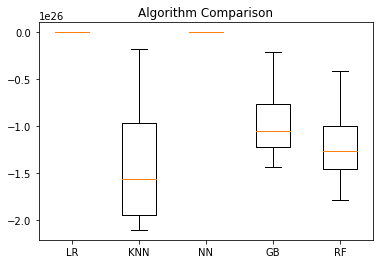

In [179]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, LassoLars, Lasso, RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt 

models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('NN', MLPRegressor(solver = 'lbfgs', random_state=42)))  #neural network
models.append(('GB', GradientBoostingRegressor(random_state=42))) 
models.append(('RF', RandomForestRegressor(n_estimators = 10, random_state=42))) # Ensemble method - collection of many decision trees


# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)

    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [180]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(random_state=42)
param_search = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(1,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'neg_mean_squared_error')
gsearch.fit(X_train, y_train)
rf_best_score = gsearch.best_score_
rf_best_model = gsearch.best_estimator_
print(f"{rf_best_model} at {rf_best_score}")

RandomForestRegressor(max_depth=14, n_estimators=10, random_state=42) at -1.1829872433382825e+26


In [89]:
model = MLPRegressor(random_state=1)
param_search = { 
    'max_iter':[ 100, 200, 400, 600, 800, 1000],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
}

tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'neg_mean_squared_error')
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
print(f"{best_model} at {best_score}")

MLPRegressor(activation='identity', max_iter=100, random_state=1,
             solver='lbfgs') at -0.013654341390242845


In [ ]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance, 4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error, 4))
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

In [84]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  1.0
mean_squared_log_error:  0.0
r2:  1.0
MAE:  0.1119
MSE:  0.0195
RMSE:  0.1395


In [86]:
y_true = y_test.values
y_pred = rf_best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.8097
mean_squared_log_error:  0.4116
r2:  0.7969
MAE:  7182949184438.882
MSE:  3.435870304621695e+26
RMSE:  18536100735110.65
